ML Final Project
Eric Wang

# **Section 1: Dataset**


The dataset used for this project was acquired via kaggle. Kaggle allows for data scientists to have access to many data sets as well as look at other people's implementations of ML. The dataset can be found [here](https://www.kaggle.com/afumetto/3dprinter).

This particular dataset focuses on 3D printing parameters. The data was acquired through research done by TR/Selcuk University Mechanical Engineering department. The printer used was *Ultimater S5* and the material/strength tests were carried out on a Sinotec GMBH capable of 20 kN.

The input parameters are: 
*   Layer Height (mm)
*   Wall Thickness (mm)
*   Infill Density (%)
*   Infill Pattern (grid, honeycomb)
*   Nozzle Temperature (Celsius)
*   Bed Temperature (Celsius)
*   Print Speed (mm/s)
*   Material (abs, pla)
*   Fan Speed (%)

The output parameters are: 
roughness, tensile strength, and elongation.

*   Roughness (micro-meters)
*   Tensile Strength (MPa)
*   Elongation (%)

Exploring the dataset
Modifying the dataset

**Exploring the Dataset:**
The area of interest for this project is to see how the input parameters affect the tensile strength. The data is first looked at in the following ways:

1.   Layer height, infill density, and nozzle temperature are individually compared against tensile strength through scatter plots. The material is labeled accordingly in the figures.
2.   Nozzle temperature is compared against tensile strength for each material. With the size of the scatter points determined by the infill density.
3.   Histograms are generated to see the general tensile strengths of ABS and PLA. Three histograms are generated:


    1.   A histogram with both ABS and PLA tensile strengths (each labeled) to see how the tensile strength values differ.
    2.   A histogram of PLA tensile strengths with the mean and median also plotted.
    3.   A histogram of ABS tensile strengths with the mean and median also plotted.




In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#read in csv file acquired from kaggle (link in first cell). CSV was uploaded locally.
df = pd.read_csv("data.csv")

#identify parameters/features
df.columns

Index(['layer_height', 'wall_thickness', 'infill_density', 'infill_pattern',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'material',
       'fan_speed', 'roughness', 'tension_strenght', 'elongation'],
      dtype='object')

In [3]:
#multiply layer height and elongation to get to correct units
df.elongation = df.elongation*100

#see how the data is formatted, notice how infill_pattern and material are strings which we will account for later
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,120.0
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,140.0
2,0.02,1,80,grid,230,70,40,abs,50,40,8,80.0
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,50.0
4,0.02,6,90,grid,250,80,40,abs,100,92,5,70.0


In [4]:
#see how many rows of data are present, we acknowledge that the dataset is small so we will apply sampling technique to increase the size of the dataset
df.shape

(50, 12)

In [5]:
#assign two dataframes by material in order to plot the values for each material separately
df_abs = df[df['material'] == 'abs']
df_pla = df[df['material'] == 'pla']

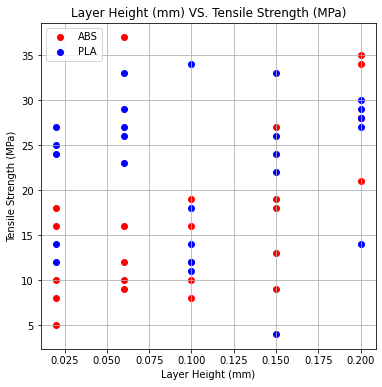

In [6]:
#Layer Height vs Tensile Strength
plt.figure(figsize=(6,6))
plt.scatter(df_abs['layer_height'], df_abs['tension_strenght'], color='r', label='ABS')
plt.scatter(df_pla['layer_height'], df_pla['tension_strenght'], color='b', label='PLA')
plt.legend()
plt.grid()

plt.title('Layer Height (mm) VS. Tensile Strength (MPa)')
plt.ylabel('Tensile Strength (MPa)')
plt.xlabel('Layer Height (mm)');

Observations

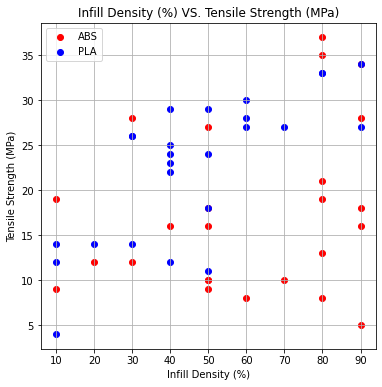

In [7]:
#Infill Density vs Tensile Strength
plt.figure(figsize=(6,6))
plt.scatter(df_abs['infill_density'], df_abs['tension_strenght'], color='r', label='ABS')
plt.scatter(df_pla['infill_density'], df_pla['tension_strenght'], color='b', label='PLA')
plt.legend()
plt.grid()

plt.title('Infill Density (%) VS. Tensile Strength (MPa)')
plt.ylabel('Tensile Strength (MPa)')
plt.xlabel('Infill Density (%)');

Observations

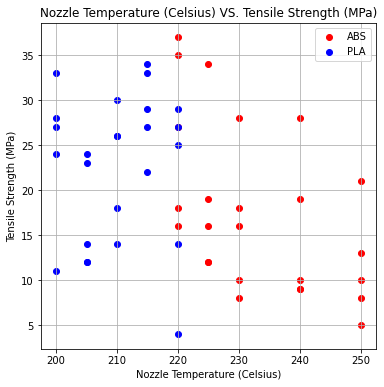

In [8]:
#Nozzle Temperature vs Tensile Strength
plt.figure(figsize=(6,6))
plt.scatter(df_abs['nozzle_temperature'], df_abs['tension_strenght'], color='r', label='ABS')
plt.scatter(df_pla['nozzle_temperature'], df_pla['tension_strenght'], color='b', label='PLA')
plt.legend()
plt.grid()

plt.title('Nozzle Temperature (Celsius) VS. Tensile Strength (MPa)')
plt.ylabel('Tensile Strength (MPa)')
plt.xlabel('Nozzle Temperature (Celsius)');

This scatter plot picques interest, so look at with infill.

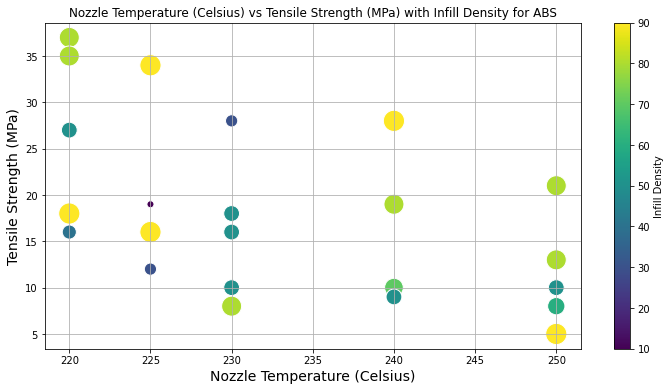

In [9]:
#Nozzle Temperature Vs Tensile Strength with Infill Density for ABS
plt.figure(figsize=(12, 6))
plt.scatter(df_abs['nozzle_temperature'], df_abs['tension_strenght'], 
            s=df_abs['infill_density']*5, c=df_abs['infill_density'], edgecolor='white')
plt.xlabel('Nozzle Temperature (Celsius)', fontsize=14)
plt.ylabel('Tensile Strength (MPa)', fontsize=14)
plt.colorbar(label='Infill Density')
plt.grid()

plt.title('Nozzle Temperature (Celsius) vs Tensile Strength (MPa) with Infill Density for ABS');

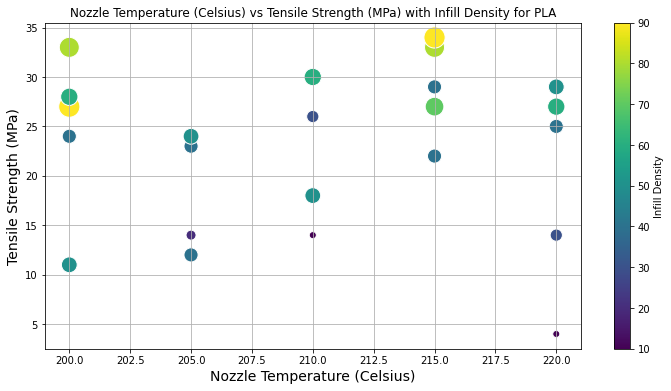

In [10]:
#Nozzle Temperature Vs Tensile Strength with Infill Density for PLA
plt.figure(figsize=(12, 6))
plt.scatter(df_pla['nozzle_temperature'], df_pla['tension_strenght'], 
            s=df_pla['infill_density']*5, c=df_pla['infill_density'], edgecolor='white')
plt.xlabel('Nozzle Temperature (Celsius)', fontsize=14)
plt.ylabel('Tensile Strength (MPa)', fontsize=14)
plt.colorbar(label='Infill Density')
plt.grid()

plt.title('Nozzle Temperature (Celsius) vs Tensile Strength (MPa) with Infill Density for PLA');

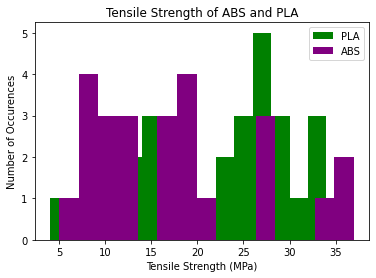

In [13]:
#Histogram - Tensile Strength of ABS/PLA
plt.hist(df_pla['tension_strenght'], color='green', bins=15, alpha=1, histtype='stepfilled', label='PLA');
plt.hist(df_abs['tension_strenght'], color='purple', bins=15, alpha=1, histtype='stepfilled', label='ABS');

plt.title('Tensile Strength of ABS and PLA')
plt.ylabel('Number of Occurences')
plt.xlabel('Tensile Strength (MPa)')
plt.legend();

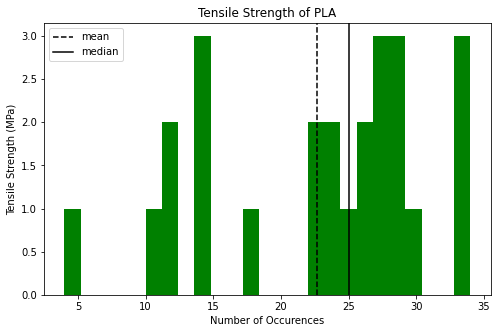

In [16]:
#Histogram - Tensile Strength of PLA With Mean and Median
plt.figure(figsize=(8,5))
plt.hist(df_pla['tension_strenght'], bins=25, color='green')
plt.axvline(df_pla['tension_strenght'].mean(), color='k', linestyle='dashed', label='mean')
plt.axvline(df_pla['tension_strenght'].median(), color='k', linestyle='solid', label='median')

plt.title('Tensile Strength of PLA')
plt.ylabel('Tensile Strength (MPa)')
plt.xlabel('Number of Occurences')
plt.legend();

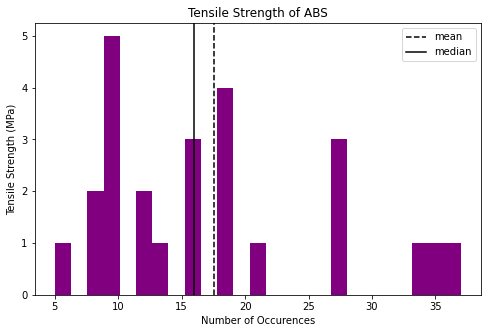

In [17]:
#Histogram - Tensile Strength of ABS With Mean and Median
plt.figure(figsize=(8,5))
plt.hist(df_abs['tension_strenght'], bins=25, color='purple')
plt.axvline(df_abs['tension_strenght'].mean(), color='k', linestyle='dashed', label='mean')
plt.axvline(df_abs['tension_strenght'].median(), color='k', linestyle='solid', label='median')

plt.title('Tensile Strength of ABS')
plt.ylabel('Tensile Strength (MPa)')
plt.xlabel('Number of Occurences')
plt.legend();

**Sampling**

Earlier we saw that there were only 50 rows of data. This is quite a small data set. Therefore, we incorporate oversampling which is creating copies of data.

We get this data by running a for loop a number of times (numRSamples). Each time the loop runs, we pull 50% of the dataset randomly.

At the end of the for loop we combine all the data frames together.

In [18]:
numRSamples = 38
frames = [df]
for i in range(numRSamples):
    rSample = df.sample(frac=0.5, replace=False, random_state=(i*100)+1)
    frames.append(rSample)

df_RS = pd.concat(frames)
df_RS.shape

(1000, 12)

We generate a tensile strength histogram of ABS and PLA to see how it compares to the previous histogram.

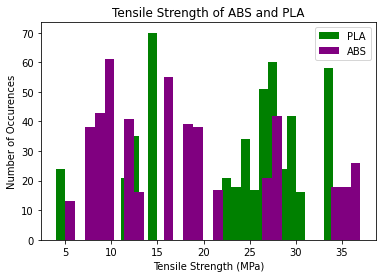

In [19]:
#Histogram - Tensile Strength of ABS/PLA
df_RS_pla = df_RS[df_RS['material'] == 'pla']
df_RS_abs = df_RS[df_RS['material'] == 'abs']

plt.hist(df_RS_pla['tension_strenght'], color='green', bins=30, alpha=1, histtype='stepfilled', label='PLA');
plt.hist(df_RS_abs['tension_strenght'], color='purple', bins=30, alpha=1, histtype='stepfilled', label='ABS');

plt.title('Tensile Strength of ABS and PLA')
plt.ylabel('Number of Occurences')
plt.xlabel('Tensile Strength (MPa)')
plt.legend();

In [20]:
print('PLA Original DataSet:')
print('Mean: ', df_pla['tension_strenght'].mean())
print('Median: ', df_pla['tension_strenght'].median())
print('Std Dev:', np.std(df_pla['tension_strenght']))

print('PLA With Random Sampling: ')
print('Mean: ', df_RS_pla['tension_strenght'].mean())
print('Median: ', df_RS_pla['tension_strenght'].median())
print('Std Dev:', np.std(df_RS_pla['tension_strenght']))

print('ABS Original Dataset:')
print('Mean: ', df_abs['tension_strenght'].mean())
print('Median: ', df_abs['tension_strenght'].median())
print('Std Dev:', np.std(df_abs['tension_strenght']))

print('ABS With Random Sampling: ')
print('Mean: ', df_RS_abs['tension_strenght'].mean())
print('Median: ', df_RS_abs['tension_strenght'].median())
print('Std Dev:', np.std(df_RS_abs['tension_strenght']))

PLA Original DataSet:
Mean:  22.64
Median:  25.0
Std Dev: 7.878477010184138
PLA With Random Sampling: 
Mean:  22.3852140077821
Median:  25.0
Std Dev: 7.9626716214526665
ABS Original Dataset:
Mean:  17.52
Median:  16.0
Std Dev: 8.998310952617718
ABS With Random Sampling: 
Mean:  17.847736625514404
Median:  16.0
Std Dev: 9.157597366522596


Evaluating the mean, median, and standard deviation, the original dataset and the newly generated dataset do not differ that much.

# **Section 2: Data Science Method**

The chosen method for this machine learning model is a linear regression model. A linear regression model was chosen as the points of interest is to see how much each feature influences the models ability to determine the output parameter tensile strength.

The steps are:

1.   Account for categorical features and convert to numerical.
2.   Compute a pairwise correlation to see how much different features correlate with each other.
3.   Train multiple linear regression models with varying features.





In [21]:
#we know that infill pattern and material are categorical therefore we need to make a modication to this dataset in order to apply these features to linear regression
df_RS_cat = pd.get_dummies(df_RS, prefix=['infill_pattern','material'], columns=['infill_pattern','material'])
df_RS_cat.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation,infill_pattern_grid,infill_pattern_honeycomb,material_abs,material_pla
0,0.02,8,90,220,60,40,0,25,18,120.0,1,0,1,0
1,0.02,7,90,225,65,40,25,32,16,140.0,0,1,1,0
2,0.02,1,80,230,70,40,50,40,8,80.0,1,0,1,0
3,0.02,4,70,240,75,40,75,68,10,50.0,0,1,1,0
4,0.02,6,90,250,80,40,100,92,5,70.0,1,0,1,0


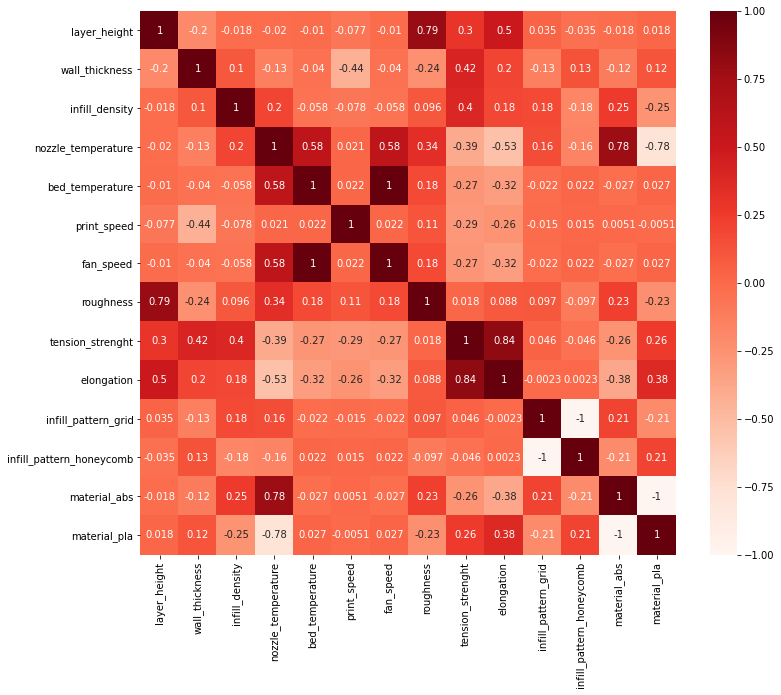

In [22]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df_RS_cat.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

We see that material and infill pattern are very important features and because of this all feature sets will include them.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import stats
from sklearn import linear_model

The following is a description of each feature set.


*   Model 1: features include all input parameters
*   Model 2: features do not include nozzle temperature, bed temperature, and fan speed
*   Model 3: features do not include layer height, infill density, and wall thickness
*   Model 4: features only include infill density, infill pattern, and material
*   Model 5: features only include infill density, infill pattern, material and wall thickness



In [27]:
from sklearn.model_selection import train_test_split

modelLin11 = linear_model.LinearRegression()
modelLin12 = linear_model.LinearRegression()
modelLin13 = linear_model.LinearRegression()
modelLin14 = linear_model.LinearRegression()
modelLin15 = linear_model.LinearRegression()

features = list(df_RS_cat.columns)

features.remove('tension_strenght')
features.remove('roughness')
features.remove('elongation')

features2 = features.copy()
features2.remove('nozzle_temperature')
features2.remove('bed_temperature')
features2.remove('fan_speed')

features3 = features.copy()
features3.remove('layer_height')
features3.remove('infill_density')
features3.remove('wall_thickness')

features4 = ['infill_density','infill_pattern_grid', 'infill_pattern_honeycomb', 'material_abs', 'material_pla']

features5 = ['infill_density','wall_thickness','infill_pattern_grid', 'infill_pattern_honeycomb', 'material_abs', 'material_pla']

train_data, test_data = train_test_split(df_RS_cat, test_size = 0.2, random_state = 1)

X11 = train_data[features]
X12 = train_data[features2]
X13 = train_data[features3]
X14 = train_data[features4]
X15 = train_data[features5]

Y11 = train_data['tension_strenght']
Y12 = train_data['elongation']

modelLin11.fit(X11, Y11)
modelLin12.fit(X12, Y11)
modelLin13.fit(X13, Y11)
modelLin14.fit(X14, Y11)
modelLin15.fit(X15, Y11)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Section 3: Results**

Following the training the linear regression models:
1.   The performance of the models are evaluated using Mean Squared Error and $R^2$ value.
2.   A parity plot of the best performing model is computed.
3.   As comparison point, multiple polynomial regression models are trained with all features.
4.   A comparison parity plot between the linear regression model and polynomial regression model is computed.

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

MSE11 = mean_squared_error(test_data['tension_strenght'], modelLin11.predict(test_data[features]))
print('Mean Square Error of Model 1: ', MSE11)
r2Score11 = r2_score(test_data['tension_strenght'], modelLin11.predict(test_data[features]))
print('R2 Value of Model 1: ', r2Score11)

MSE12 = mean_squared_error(test_data['tension_strenght'], modelLin12.predict(test_data[features2]))
print('Mean Square Error of Model 2: ', MSE12)
r2Score12 = r2_score(test_data['tension_strenght'], modelLin12.predict(test_data[features2]))
print('R2 Value of Model 2: ', r2Score12)

MSE13 = mean_squared_error(test_data['tension_strenght'], modelLin13.predict(test_data[features3]))
print('Mean Square Error of Model 3: ', MSE13)
r2Score13 = r2_score(test_data['tension_strenght'], modelLin13.predict(test_data[features3]))
print('R2 Value of Model 3: ', r2Score13)

MSE14 = mean_squared_error(test_data['tension_strenght'], modelLin14.predict(test_data[features4]))
print('Mean Square Error of Model 4: ', MSE14)
r2Score14 = r2_score(test_data['tension_strenght'], modelLin14.predict(test_data[features4]))
print('R2 Value of Model 4: ', r2Score14)
#crazy just infill density plus infill type + material is better performing than knowing 
#['nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed', 'infill_pattern_grid', 'infill_pattern_honeycomb', 'material_abs', 'material_pla']

MSE15 = mean_squared_error(test_data['tension_strenght'], modelLin15.predict(test_data[features5]))
print('Mean Square Error of Model 5: ', MSE15)
r2Score15 = r2_score(test_data['tension_strenght'], modelLin15.predict(test_data[features5]))
print('R2 Value of Model 5: ', r2Score15)

Mean Square Error of Model 1:  27.659226239746804
R2 Value of Model 1:  0.640632454684813
Mean Square Error of Model 2:  38.55431598689377
R2 Value of Model 2:  0.49907601256010714
Mean Square Error of Model 3:  52.560321454044924
R2 Value of Model 3:  0.31710043013516376
Mean Square Error of Model 4:  50.978117945640335
R2 Value of Model 4:  0.33765749800379985
Mean Square Error of Model 5:  46.995188323590334
R2 Value of Model 5:  0.3894064380873947


We see that the model trained with all the features has the smallest mean square error and highest R2 value. What is quite interesting is the performance of models 4 and 5 compared to model 3.

Model 3 is trained on all features except layer height, infill density, and wall thickness. However, it performs worse than model 4 and model 5 which were trained on less features but more dominant ones. This makes sense as infill density determines the amount of material within the 3D printed part. Knowing how much material is inside the part is important when determining the tensile strength. Model 3 shows that while nozzle temperature, bed tempeature, and fan speed are important they are not as crucial as other features when determining the tensile strength of ABS/PLA.

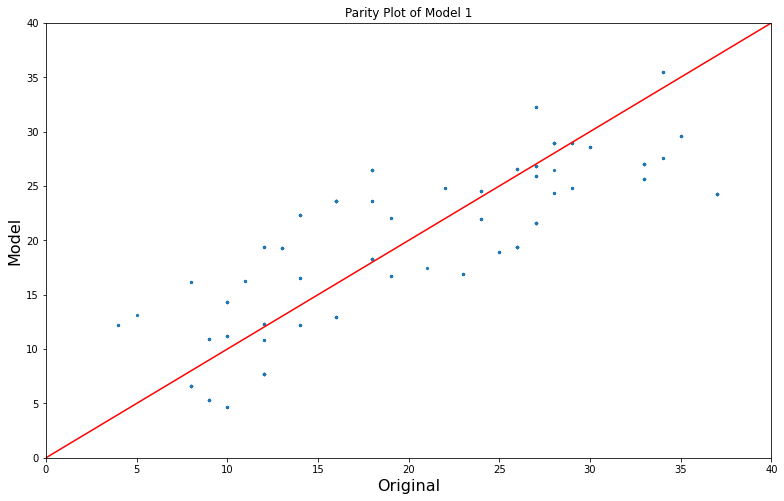

In [30]:
#Parity plot of Model 1
plt.figure(figsize=(13,8))
plt.scatter(test_data['tension_strenght'], modelLin11.predict(test_data[features]), s=5)
plt.xlabel('Original', fontsize = 16)
plt.ylabel('Model', fontsize = 16)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.plot(np.linspace(0,40,40),np.linspace(0,40,40), c='r')
plt.title('Parity Plot of Model 1')
plt.show()

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

poly_models = []
R2Scores = []
MSEs = []
for i in range(5):
    poly_model = make_pipeline(PolynomialFeatures(i+1), LinearRegression())
    poly_models.append(poly_model)
    poly_models[i].fit(X11, Y11)
    MSE = mean_squared_error(test_data['tension_strenght'], poly_models[i].predict(test_data[features]))
    MSEs.append(MSE)
    r2Score = r2_score(test_data['tension_strenght'], poly_models[i].predict(test_data[features]))
    R2Scores.append(r2Score)
    print('Mean Squared Error for ',i+1,' feature(s):', MSE)
    print('R2 Value for ',i+1,' feature(s):', r2Score)

Mean Squared Error for  1  feature(s): 27.659226239747017
R2 Value for  1  feature(s): 0.6406324546848103
Mean Squared Error for  2  feature(s): 2.845367326107507
R2 Value for  2  feature(s): 0.9630310456756779
Mean Squared Error for  3  feature(s): 2.8284366680806742e-24
R2 Value for  3  feature(s): 1.0
Mean Squared Error for  4  feature(s): 2.832235317329239e-25
R2 Value for  4  feature(s): 1.0
Mean Squared Error for  5  feature(s): 5.018882015954983e-25
R2 Value for  5  feature(s): 1.0


While the polynomials with 3,4, and 5 features perform very well. They could be susceptible to overfitting. Because of this the model trained with 2 features has its parity plot computed.

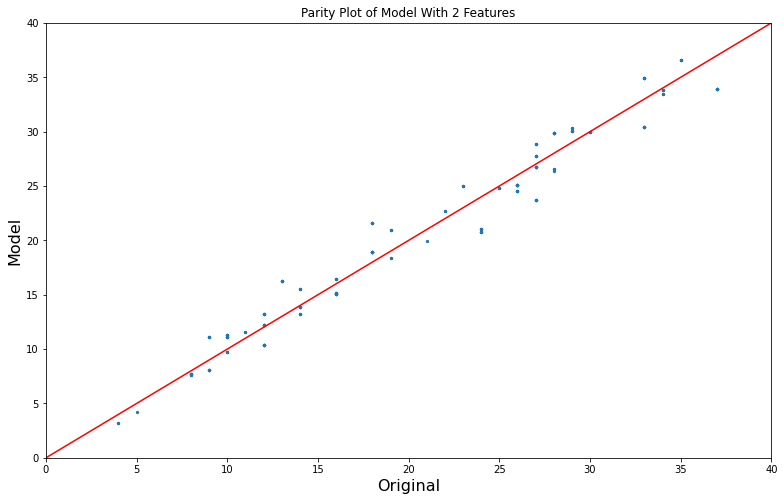

In [40]:
#Parity plot of polyonmial regression with 2 features
plt.figure(figsize=(13,8))
plt.scatter(test_data['tension_strenght'], poly_models[1].predict(test_data[features]), s=5)
plt.xlabel('Original', fontsize = 16)
plt.ylabel('Model', fontsize = 16)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.plot(np.linspace(0,40,40),np.linspace(0,40,40), c='r')
plt.title('Parity Plot of Model With 2 Features')
plt.show()

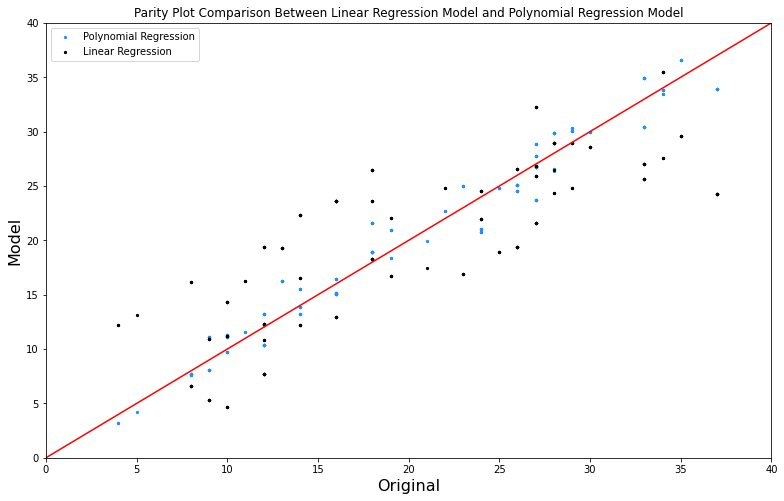

In [41]:
#Parity Comparison
plt.figure(figsize=(13,8))
plt.scatter(test_data['tension_strenght'], poly_models[1].predict(test_data[features]), s=5, c='dodgerblue', label='Polynomial Regression')
plt.scatter(test_data['tension_strenght'], modelLin11.predict(test_data[features]), s=5, c='k', label='Linear Regression')
plt.xlabel('Original', fontsize = 16)
plt.ylabel('Model', fontsize = 16)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.plot(np.linspace(0,40,40),np.linspace(0,40,40), c='r')
plt.title('Parity Plot Comparison Between Linear Regression Model and Polynomial Regression Model')
plt.legend()
plt.show()

In conclusion, we identified that the linear regression model performed the best when all features were used to train the model. We also identifed which features were more crucial when training the model. The features of the infill density, infill pattern, and material carried more weight than the features of nozzle temperature, bed temperature, and fan speed.

